In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
# loading datasets into dataframe
df_ireland = pd.read_csv("HSM09.20230503130900.csv")
df_Germany = pd.read_csv("Germany-data1.csv")

In [16]:
# displaying the dataframe
df_ireland

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
0,HSM09,House Construction Cost Index,1975M01,1975M01,-,State,Base Jan 1991=100,18.3
1,HSM09,House Construction Cost Index,1975M02,1975M02,-,State,Base Jan 1991=100,18.7
2,HSM09,House Construction Cost Index,1975M03,1975M03,-,State,Base Jan 1991=100,18.8
3,HSM09,House Construction Cost Index,1975M04,1975M04,-,State,Base Jan 1991=100,19.6
4,HSM09,House Construction Cost Index,1975M05,1975M05,-,State,Base Jan 1991=100,19.8
...,...,...,...,...,...,...,...,...
508,HSM09,House Construction Cost Index,2017M04,2017M04,-,State,Base Jan 1991=100,210.7
509,HSM09,House Construction Cost Index,2017M05,2017M05,-,State,Base Jan 1991=100,211.1
510,HSM09,House Construction Cost Index,2017M06,2017M06,-,State,Base Jan 1991=100,211.2
511,HSM09,House Construction Cost Index,2017M07,2017M07,-,State,Base Jan 1991=100,211.4


In [17]:
# replacing M with -
df_ireland['Month'] = df_ireland['Month'].str.replace('M', '-')

In [18]:
# show the dataframe
df_ireland

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
0,HSM09,House Construction Cost Index,1975M01,1975-01,-,State,Base Jan 1991=100,18.3
1,HSM09,House Construction Cost Index,1975M02,1975-02,-,State,Base Jan 1991=100,18.7
2,HSM09,House Construction Cost Index,1975M03,1975-03,-,State,Base Jan 1991=100,18.8
3,HSM09,House Construction Cost Index,1975M04,1975-04,-,State,Base Jan 1991=100,19.6
4,HSM09,House Construction Cost Index,1975M05,1975-05,-,State,Base Jan 1991=100,19.8
...,...,...,...,...,...,...,...,...
508,HSM09,House Construction Cost Index,2017M04,2017-04,-,State,Base Jan 1991=100,210.7
509,HSM09,House Construction Cost Index,2017M05,2017-05,-,State,Base Jan 1991=100,211.1
510,HSM09,House Construction Cost Index,2017M06,2017-06,-,State,Base Jan 1991=100,211.2
511,HSM09,House Construction Cost Index,2017M07,2017-07,-,State,Base Jan 1991=100,211.4


In [19]:
#df_ireland = df_ireland[df_ireland['Month'] != '2007-O4']
# Replace '2007-O4' with NaN
#df_ireland['Month'] = df_ireland['Month'].replace('2007-O4', pd.NaT)

In [20]:
print(df_ireland.columns)

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(M1)', 'Month', 'C02196V02652',
       'State', 'UNIT', 'VALUE'],
      dtype='object')


In [21]:
# remove '2007-O4' value
df_ireland = df_ireland[df_ireland['Month'] != '2007-O4']

In [22]:
#df_ireland['Month'] = df_ireland['Month'].str.replace('MO', '-')
df_ireland['Month'] = pd.to_datetime(df_ireland['Month'], format='%Y-%m')
df_ireland['Year'] = df_ireland['Month'].dt.year


C:\Users\chris\AppData\Local\Temp\ipykernel_8112\2764402531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Month'] = pd.to_datetime(df_ireland['Month'], format='%Y-%m')
C:\Users\chris\AppData\Local\Temp\ipykernel_8112\2764402531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Year'] = df_ireland['Month'].dt.year


In [23]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 512
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        512 non-null    object        
 1   STATISTIC Label  512 non-null    object        
 2   TLIST(M1)        512 non-null    object        
 3   Month            512 non-null    datetime64[ns]
 4   C02196V02652     512 non-null    object        
 5   State            512 non-null    object        
 6   UNIT             512 non-null    object        
 7   VALUE            512 non-null    float64       
 8   Year             512 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 40.0+ KB


In [24]:
cols = df_ireland.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_ireland = df_ireland[cols]

In [25]:
# renaming the column
df_ireland=df_ireland.rename(columns={'VALUE': 'Cost-Ireland'})

In [26]:
# Sort the dataframe by year
df_ireland.sort_values(by='Year')

# Calculate annual percent change for Cost column
df_ireland['Annual%change'] = df_ireland['Cost-Ireland'].pct_change(periods=1)
df_ireland['Annual%change'] = (1 + df_ireland['Annual%change']).pow(12) - 1

In [27]:
# description of dataset
df_ireland.describe()

,Year,Cost-Ireland,Annual%change
count,512.000000,512.000000,511.000000
mean,1995.835938,126.052344,0.073622
std,12.329956,63.650513,0.230492
min,1975.000000,18.300000,-0.619872
25%,1985.000000,78.800000,0.000000
50%,1996.000000,115.900000,0.012759
75%,2006.250000,198.275000,0.059098
max,2017.000000,211.400000,2.769370


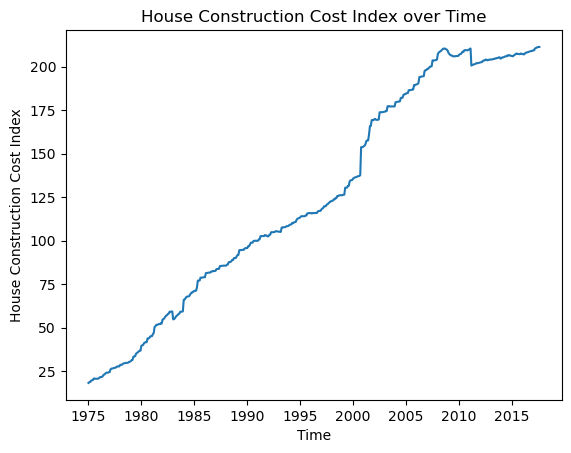

In [28]:
# Create a line plot
plt.plot(df_ireland['Month'], df_ireland['Cost-Ireland'])
plt.title('House Construction Cost Index over Time')
plt.xlabel('Time')
plt.ylabel('House Construction Cost Index')
plt.show()

In [29]:
df_ireland = df_ireland.groupby('Year').mean()

In [30]:
# resetting of dataframe
df_ireland = df_ireland.reset_index()


In [31]:
df_ireland = df_ireland[(df_ireland['Year'] >= 2001) & (df_ireland['Year'] <= 2017)][['Year', 'Cost-Ireland', 'Annual%change']]
